In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [68]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['price'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=data['feature_names'])



In [71]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [72]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

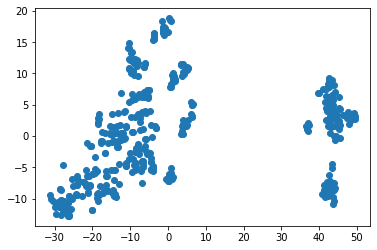

In [73]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [98]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train)
labels_train


array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

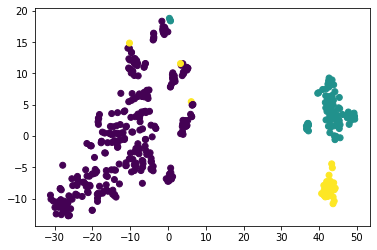

In [99]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [100]:
df1 = pd.DataFrame(X_train)
df1['price'] = y_train
df1['class'] = labels_train

print('Cluster 1 mean CRIM= ' + str(df1.loc[df1['class'] == 0]['CRIM'].mean()))
print('Cluster 2 mean CRIM= ' + str(df1.loc[df1['class'] == 1]['CRIM'].mean()))
print('Cluster 3 mean CRIM= ' + str(df1.loc[df1['class'] == 2]['CRIM'].mean()))

print('Cluster 1 mean price= ' + str(df1.loc[df1['class'] == 0]['price'].mean()))
print('Cluster 2 mean price= ' + str(df1.loc[df1['class'] == 1]['price'].mean()))
print('Cluster 3 mean price= ' + str(df1.loc[df1['class'] == 2]['price'].mean()))

Cluster 1 mean CRIM= 0.40486282828282844
Cluster 2 mean CRIM= 11.745661842105266
Cluster 3 mean CRIM= 14.360380322580648
Cluster 1 mean price= 25.168686868686873
Cluster 2 mean price= 17.4421052631579
Cluster 3 mean price= 13.196774193548386


In [97]:
labels_test = kmeans.fit(X_test)

In [78]:
df1 = pd.DataFrame(X_test)
df1['price'] = y_test
df1['class'] = labels_test
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,class
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,0
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,0
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,1
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,0
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,2
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,2
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2,2
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5,0


In [95]:
print('Cluster 1 mean CRIM= ' + str(df1.loc[df1['class'] == 0]['CRIM'].mean()))
print('Cluster 2 mean CRIM= ' + str(df1.loc[df1['class'] == 1]['CRIM'].mean()))
print('Cluster 3 mean CRIM= ' + str(df1.loc[df1['class'] == 2]['CRIM'].mean()))

print('Cluster 1 mean price= ' + str(df1.loc[df1['class'] == 0]['price'].mean()))
print('Cluster 2 mean price= ' + str(df1.loc[df1['class'] == 1]['price'].mean()))
print('Cluster 3 mean price= ' + str(df1.loc[df1['class'] == 2]['price'].mean()))

Cluster 1 mean CRIM= 0.2464211594202899
Cluster 2 mean CRIM= 8.469301923076923
Cluster 3 mean CRIM= 19.021665714285714
Cluster 1 mean price= 23.911594202898552
Cluster 2 mean price= 17.39230769230769
Cluster 3 mean price= 12.814285714285713


In [96]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [ ]:
labels_test = kmeans.predict(X_train)